In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
print("Setup complete")

Setup complete


In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [5]:
missing_val_count_by_col = df.isnull().sum()
print(missing_val_count_by_col[missing_val_count_by_col > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
ctg = [var for var in df.columns if (df[var].dtype == 'O')]
print("#ctg = {}\n".format(len(ctg)))
print("ctg\n", ctg)

#ctg = 5

ctg
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [5]:
df[ctg].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [6]:
df[ctg].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [7]:
#frequency count of the categorical variables
for var in ctg:
    print(df[var].value_counts(), '\n')

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Leng

In [8]:
df.shape

(891, 12)

In [9]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [10]:
def lineplot(x, y):
    plt.figure(figsize = (16, 6))
    sns.lineplot(x = x, y = y, data = df)
    plt.show()

def barplot(x, y):
    plt.figure(figsize = (16, 6))
    sns.barplot(x = x, y = y, data = df)
    plt.show()

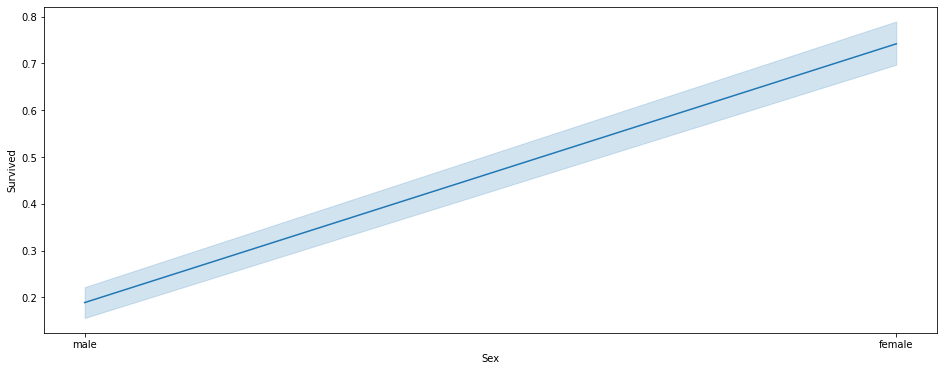

In [11]:
lineplot("Sex", "Survived")

In [12]:
ctg

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

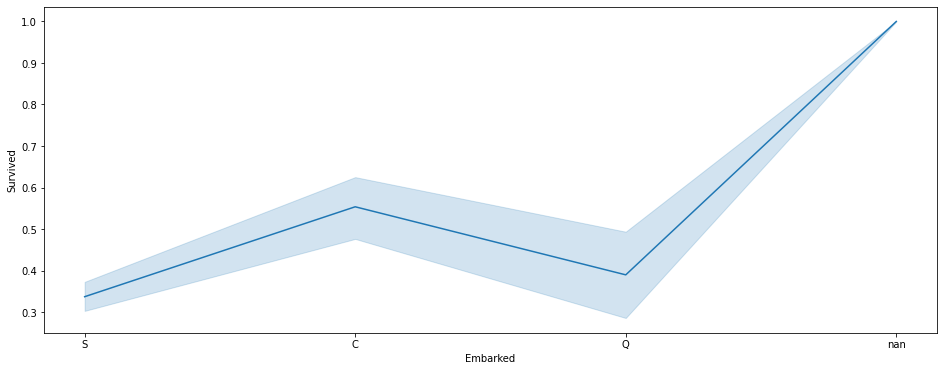

In [13]:
df["Embarked"] = df["Embarked"].astype(str)
lineplot("Embarked" ,"Survived")

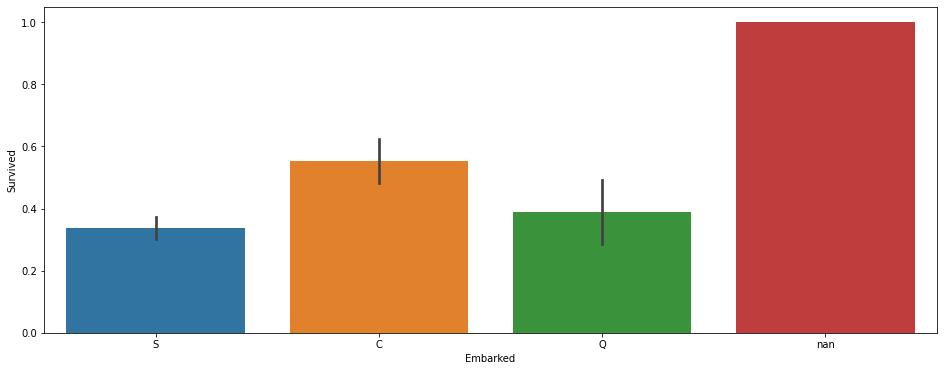

In [14]:
barplot("Embarked", "Survived")

# Inference

* **Of those whose data are present we can say that mortaility rate for people emabrked from Southampton and Queenstown are high**
* **People from Cherbourg have high survivility rate**


In [15]:
# cardinality
for var in ctg:
    print(var, 'contains ', len(df[var].unique()), ' labels')

Name contains  891  labels
Sex contains  2  labels
Ticket contains  681  labels
Cabin contains  148  labels
Embarked contains  4  labels


**Some of our data has high cardinality i.e large number of categorical labels. We can resolve this during encoding** 

In [16]:
numerical = [var for var in df.columns if (df[var].dtype != 'O')]
print('There are {} numerical data\n'.format(len(numerical)))
print('numerical\n', numerical)

There are 7 numerical data

numerical
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [17]:
df[numerical].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [18]:
df[numerical].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [19]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

We can see that age has Nan values

In [60]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
test_data["Embarked"] = test_data["Embarked"].astype(str)

In [23]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
X_train =  df.drop(['Survived'], axis = 1)
y_train = df['Survived']

# FEATURE ENGINEERING


In [25]:
X_train[ctg].isnull().mean()

Name        0.000000
Sex         0.000000
Ticket      0.000000
Cabin       0.771044
Embarked    0.000000
dtype: float64

## For handling missing values for categorical variable we have following methods

* Ignore observation
* Replace by most frequent value
* Replace using an algorithm like KNN using the neighbours.
* Predict the observation using a multiclass predictor.

In [26]:
for df2 in [X_train, test_data]:
    df2['Cabin'].fillna(df2['Cabin'].mode()[0], inplace=True);

In [27]:
X_train[ctg].isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [28]:
test_data[ctg].isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

## Handling missing values for numerical data
* median
* mean

In [29]:
numerical.remove('Survived')

In [30]:
X_train[numerical].isnull().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [31]:
test_data[numerical].isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [32]:
for data in [X_train, test_data]:
   for clm in numerical:
       if(data[clm].isnull().sum() != 0):
           print('Filling missing value for {}\n'.format(clm))
           data[clm].fillna(data[clm].median(), inplace=True)

Filling missing value for Age

Filling missing value for Age

Filling missing value for Fare



In [33]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Encoding categorical variable

We will try all encoders

In [35]:
import category_encoders as ce

In [36]:
encoder = ce.OneHotEncoder(cols = ctg)
X_train = encoder.fit_transform(X_train)
test_data = encoder.transform(test_data)

/home/adleon/miniconda3/envs/ryednap/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
X_train.head()

,PassengerId,Pclass,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,...,Cabin_142,Cabin_143,Cabin_144,Cabin_145,Cabin_146,Cabin_147,Embarked_1,Embarked_2,Embarked_3,Embarked_4
0,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
X_train.shape

(891, 1731)

# Feature Scaling
We now have training and testing set ready for model building. 
Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

In [62]:
cols = X_train.columns
psgID = test_data['PassengerId']

In [40]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
rbScaler = RobustScaler() #for removing outlier
stdScaler = StandardScaler() #for normal normal distribution


In [41]:
X_train = rbScaler.fit_transform(X_train)
test_data = rbScaler.transform(test_data)

In [42]:
X_train = pd.DataFrame(X_train, columns = [cols])
test_data = pd.DataFrame(test_data, columns = [cols])

# MODEL TRAINING

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred = gnb.predict(test_data)

In [47]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
test_data.columns

MultiIndex([('PassengerId',),
            (     'Pclass',),
            (     'Name_1',),
            (     'Name_2',),
            (     'Name_3',),
            (     'Name_4',),
            (     'Name_5',),
            (     'Name_6',),
            (     'Name_7',),
            (     'Name_8',),
            ...
            (  'Cabin_142',),
            (  'Cabin_143',),
            (  'Cabin_144',),
            (  'Cabin_145',),
            (  'Cabin_146',),
            (  'Cabin_147',),
            ( 'Embarked_1',),
            ( 'Embarked_2',),
            ( 'Embarked_3',),
            ( 'Embarked_4',)],
           length=1731)

In [64]:
res = pd.DataFrame({
    'PassengerId' : psgID,
    'Survived' : y_pred
})

In [52]:
sample = pd.read_csv("gender_submission.csv")

In [53]:
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
res

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [76]:
res.to_csv('submission1.0.csv', index=False)

In [77]:
check = pd.read_csv('submission1.0.csv')
check.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


PassengerId is not discrete
Secondly, is it fine to feature scale for test dat a
Try chaning ecoding method
Try changing the naive bayes
Try removing some features which seme not useful.